# Final Project Submission

Please fill out:
* Student name: Marife Ramoran
* Student pace: Self paced
* Scheduled project review date/time: 17 December 2023
* Instructor name: Hardik Idnani
* Blog post URL:
***


<a id='8.5'></a>
<p style="font-size: 20px; color: white; font-family: 'Comic Sans MS'; text-align: center; background-color: gray; border-radius: 8px 8px;"><strong>Flight Price Prediction</strong></p>


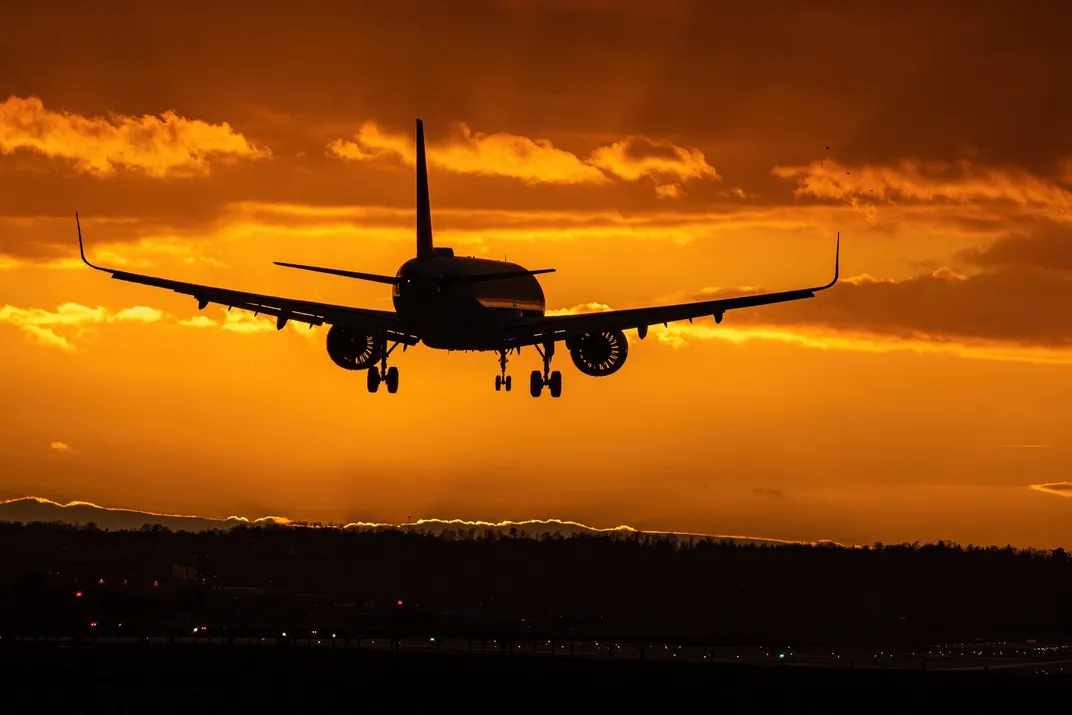

## Overview
***
In this project, we aim to predict domestic flight prices in India for the period between March 2019 and July 2019 using linear regression and data analysis techniques. The goal is to provide travelers with accurate predictions to assist in planning and budgeting for their flights.

## Business Problem
***
The business seeks to develop a robust solution utilizing linear regression and data analysis techniques. The absence of a comprehensive predictive model not only hinders the efficient allocation of travel budgets but also diminishes the overall satisfaction and confidence of travelers in the planning process. Therefore, our business problem revolves around the imperative need to fill this void and deliver a sophisticated predictive tool that empowers travelers with accurate flight price forecasts, ultimately transforming the travel planning landscape.

## Exploratory Data Analysis 
***

Utilizing visualization techniques, we will analyze the distribution of flight prices, discern trends, and investigate potential correlations among various features. This phase is instrumental in guiding informed decisions related to feature selection and gaining insights into the inherent patterns within the dataset. The dataset comprises 10,682 entries encompassing comprehensive details about flights, including information about the airline, date of journey, destination, and duration.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
from seaborn import displot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

### Dataset Importation:
1. To import the dataset, we utilize the pandas library and employ the `read_excel` method since the data is structured in an Excel file.
2. Following the import, a crucial step involves examining for null values within specific columns or rows.
3. If null values are identified, several strategies can be applied:
   - Filling NaN values with the mean, median, or mode using the `fillna()` method.
   - In cases where the number of missing values is minimal, we may opt to drop those entries altogether.

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.shape

(10683, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

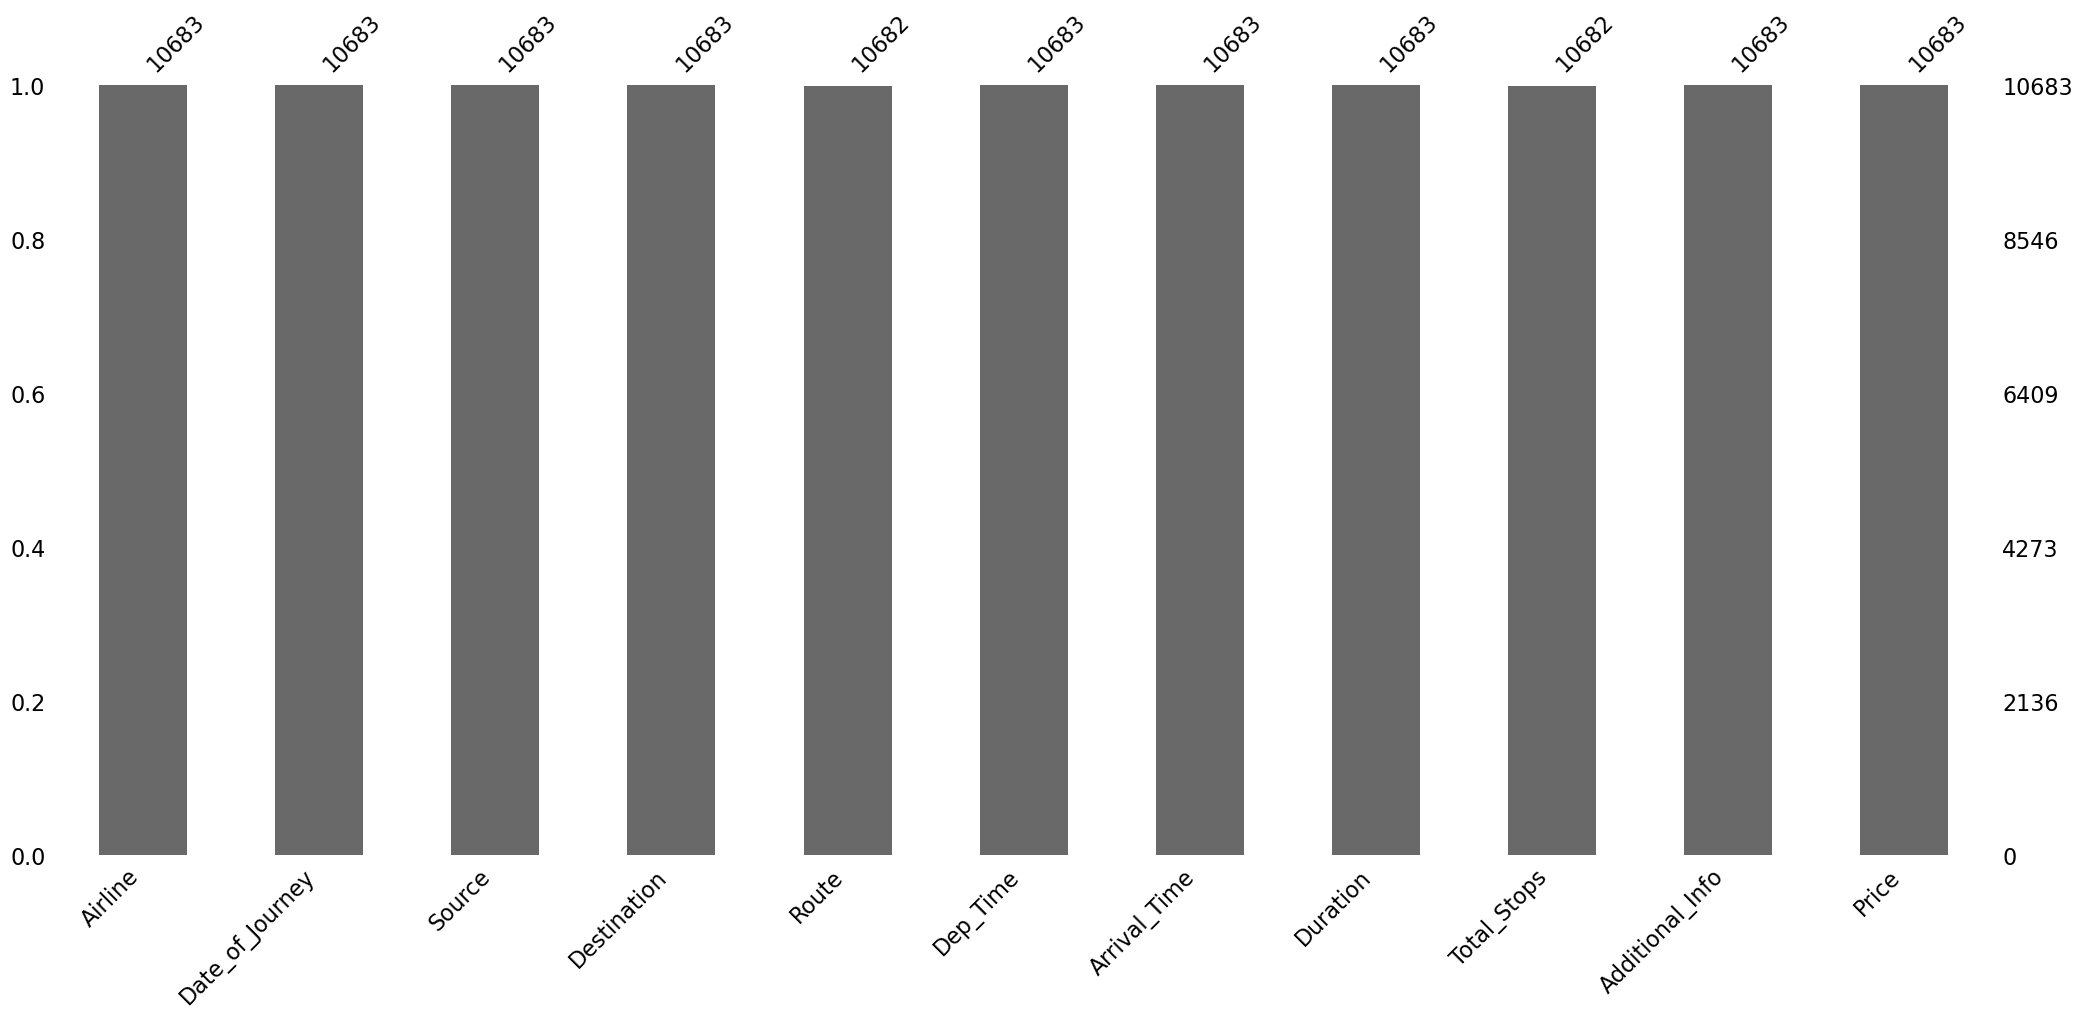

In [8]:
msno.bar(df)
plt.show

In [9]:
# We identify two instances of missing values, 
# and it is feasible to promptly eliminate these entries, given their minimal occurrence.
df.dropna(inplace= True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Cleaning
***

In [11]:
# Datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# # The data types of `Date_of_journey`, `Arrival_Time`, and `Dep_Time` are currently defined as objects. 
# To facilitate accurate prediction, it is imperative to convert them into date and time formats.

# Utilizing the `dt.day` method will extract the day from the given date, 
# while the `dt.month` method will specifically extract the month information.

def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [17]:
# Subsequently, we extract the day and month from the 'Date_of_journey' and store them in two separate columns.
# As a result, the 'Date_of_Journey' column becomes redundant, and we proceed to drop it.

df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

df['Total_Stops']= df['Total_Stops'].replace('non-stop', '0')
df['Total_Stops']= df['Total_Stops'].replace('1 stop', '1')
df['Total_Stops']= df['Total_Stops'].replace('2 stops', '2')
df['Total_Stops']= df['Total_Stops'].replace('3 stops', '3')
df['Total_Stops']= df['Total_Stops'].replace('4 stops', '4')

df['Airline']= df['Airline'].replace('Air India', '0')
df['Airline']= df['Airline'].replace('GoAir', '1')
df['Airline']= df['Airline'].replace('IndiGo', '2')
df['Airline']= df['Airline'].replace('Jet Airways', '3')
df['Airline']= df['Airline'].replace('Jet Airways Business', '4')
df['Airline']= df['Airline'].replace('Multiple carriers', '5')
df['Airline']= df['Airline'].replace('Multiple carriers Premium economy', '6')
df['Airline']= df['Airline'].replace('SpiceJet', '7')
df['Airline']= df['Airline'].replace('Trujet', '8')
df['Airline']= df['Airline'].replace('Vistara', '9')
df['Airline']= df['Airline'].replace('Vistara Premium economy', '10')
df['Airline']= df['Airline'].replace('Air Asia', '11')

df['Source']= df['Source'].replace('Chennai', '0')
df['Source']= df['Source'].replace('Delhi', '1')
df['Source']= df['Source'].replace('Kolkata', '2')
df['Source']= df['Source'].replace('Mumbai', '3')
df['Source']= df['Source'].replace('Banglore', '4')

df['Destination']= df['Destination'].replace('Chennai', '0')
df['Destination']= df['Destination'].replace('Delhi', '1')
df['Destination']= df['Destination'].replace('Kolkata', '2')
df['Destination']= df['Destination'].replace('Mumbai', '3')
df['Destination']= df['Destination'].replace('Banglore', '4')
df['Destination']= df['Destination'].replace('Cochin', '5')
df['Destination']= df['Destination'].replace('New Delhi', '6')
df['Destination']= df['Destination'].replace('Hyderabad', '7')

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-17 05:50:00,2023-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-17 09:25:00,2023-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-12-17 18:05:00,2023-12-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-12-17 16:50:00,2023-12-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
df.drop(['Date_of_Journey', 'Route', 'Additional_Info', 'journey_day'], axis=1, inplace=True)

In [20]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [21]:
# Execute the function.
# Departure time denotes the moment a plane departs from the gate.
# Similar to the process applied to 'Date_of_Journey,' we can extract relevant values from 'Dep_Time.'

extract_hour(df,'Dep_Time')

# Extracting minutes
extract_min(df,'Dep_Time')

# Drop the column
drop_col(df,'Dep_Time')

In [22]:
# Extracting hour
extract_hour(df,'Arrival_Time')

# Extracting min
extract_min(df,'Arrival_Time')


# Drop the column
drop_col(df,'Arrival_Time')

In [23]:
# Let's carry out pre-processing on the 'duration' column
# by isolating the duration hours and minutes from the duration values.

duration= list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains hour only
             duration[i]=duration[i] + ' 0m' # Adds zero minute
        else: 
             duration[i]='0h '+ duration[i]

In [24]:
df['duration']= duration

In [25]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,22,20,1,10,2h 50m
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,50,13,15,7h 25m
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,9,25,4,25,19h 0m
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,18,5,23,30,5h 25m
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,16,50,21,35,4h 45m


In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]


In [27]:
# Extract hours and minutes from 'Duration' and convert to total minutes
df['Duration_hours'] = df['duration'].apply(lambda x: int(x.split('h')[0]) * 60 if 'h' in x else 0)
df['Duration_minutes'] = df['duration'].apply(lambda x: int(x.split('m')[0].split()[-1]) if 'm' in x else 0)

# Convert the total duration to minutes
df['Duration_total_minutes'] = df['Duration_hours'] + df['Duration_minutes']

In [28]:
# Drop the original 'duration' column
df.drop('duration', axis=1, inplace=True)

#
df.drop(['Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours', 'Duration_minutes', 'Duration'], axis=1, inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


In [30]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Total_Stops               object
Price                      int64
journey_month              int64
Duration_total_minutes     int64
dtype: object

In [31]:
# Finding the categorical values

column= [column for column in df.columns if df[column].dtype=='object']

In [32]:
# Finding the continuous values

continuous_col = [column for column in df.columns if df[column].dtype!='object']

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


### Model 1

In [34]:
outcome = 'Price'
predictors = df.drop(['Price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [35]:
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     730.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:59:34   Log-Likelihood:            -1.0036e+05
No. Observations:               10682   AIC:                         2.008e+05
Df Residuals:                   10659   BIC:                         2.009e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     6583.7855    162.734     40.457      0.000    6264.797    6902.774
Airline[T.Air India]                          1742.2921    185.298      9.403      0.000    1379.074    2105.510
Airline[T.GoAir]                               -96.2927    267.162     -0.360      0.719    -619.980     427.394
Airline[T.IndiGo]                              265.4446    177.009      1.500      0.134     -81.526     612.415
Airline[T.Jet Airways]                        4180.9711    175.428     23.833      0.000    3837.100    4524.843
Airline[T.Jet Airways Business]               4.829e+04   1204.761     40.080      0.000    4.59e+04    5.06e+04
Airline[T.Multiple carriers]                  3397.6307    193.601     17.550      0.000    3018.137    3777.125
Airline[T.Multiple carriers Premium economy]  3940.4214    827.400      4.762      0.000    2318.563    5562.280
Airline[T.SpiceJet]                           -232.7289    195.219     -1.192      0.233    -615.394     149.936
Airline[T.Trujet]                            -2169.6040   2923.649     -0.742      0.458   -7900.501    3561.293
Airline[T.Vistara]                            2100.4261    213.424      9.842      0.000    1682.075    2518.778
Airline[T.Vistara Premium economy]            4071.3016   1692.073      2.406      0.016     754.523    7388.080
Source[T.Chennai]                              734.6492     77.290      9.505      0.000     583.146     886.153
Source[T.Delhi]                                494.2684     37.387     13.220      0.000     420.984     567.553
Source[T.Kolkata]                             1101.7675     64.508     17.080      0.000     975.320    1228.215
Source[T.Mumbai]                               -45.2265     60.055     -0.753      0.451    -162.946      72.493
Destination[T.Cochin]                          494.2684     37.387     13.220      0.000     420.984     567.553
Destination[T.Delhi]                           589.5872     96.888      6.085      0.000     399.668     779.506
Destination[T.Hyderabad]                       -45.2265     60.055     -0.753      0.451    -162.946      72.493
Destination[T.Kolkata]                         734.6492     77.290      9.505      0.000     583.146     886.153
Destination[T.New Delhi]                      3708.7397     89.429     41.472      0.000    3533.443    3884.036
Total_Stops[T.2 stops]                        2260.4214     99.913     22.624      0.000    2064.574    2456.269
Total_Stops[T.3 stops]                        3291.4006    444.827      7.399      0.000    2419.457    4163.344
Total_Stops[T.4 stops]                        5688.7446   2918.449      1.949      0.051     -31.961    1.14e+04
Total_Stops[T.non-stop]         

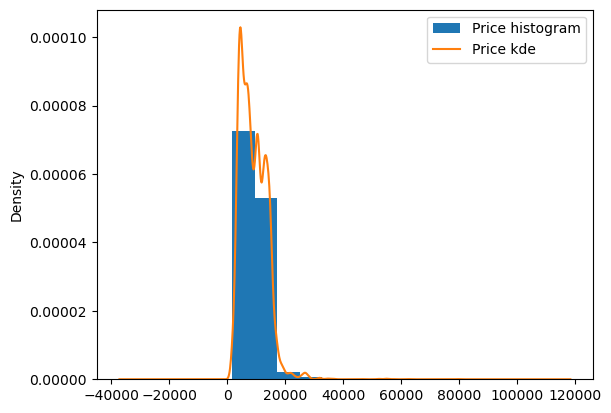

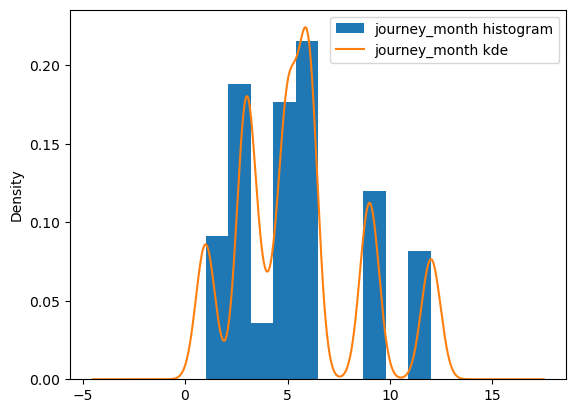

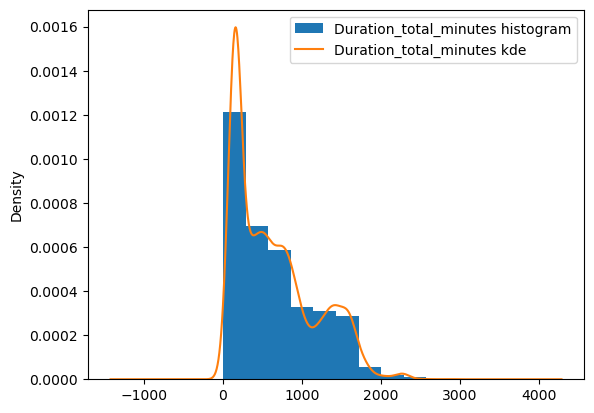

In [36]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].plot.hist(density=True, label=column + ' histogram')
        df[column].plot.kde(label=column + ' kde')
        plt.legend()
        plt.show()


# Handling Categorical Data
***
We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order > one hot encoding
#### Ordinal data -- Data are in order > labelEncoder

In [37]:
categorical= df[column]

In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


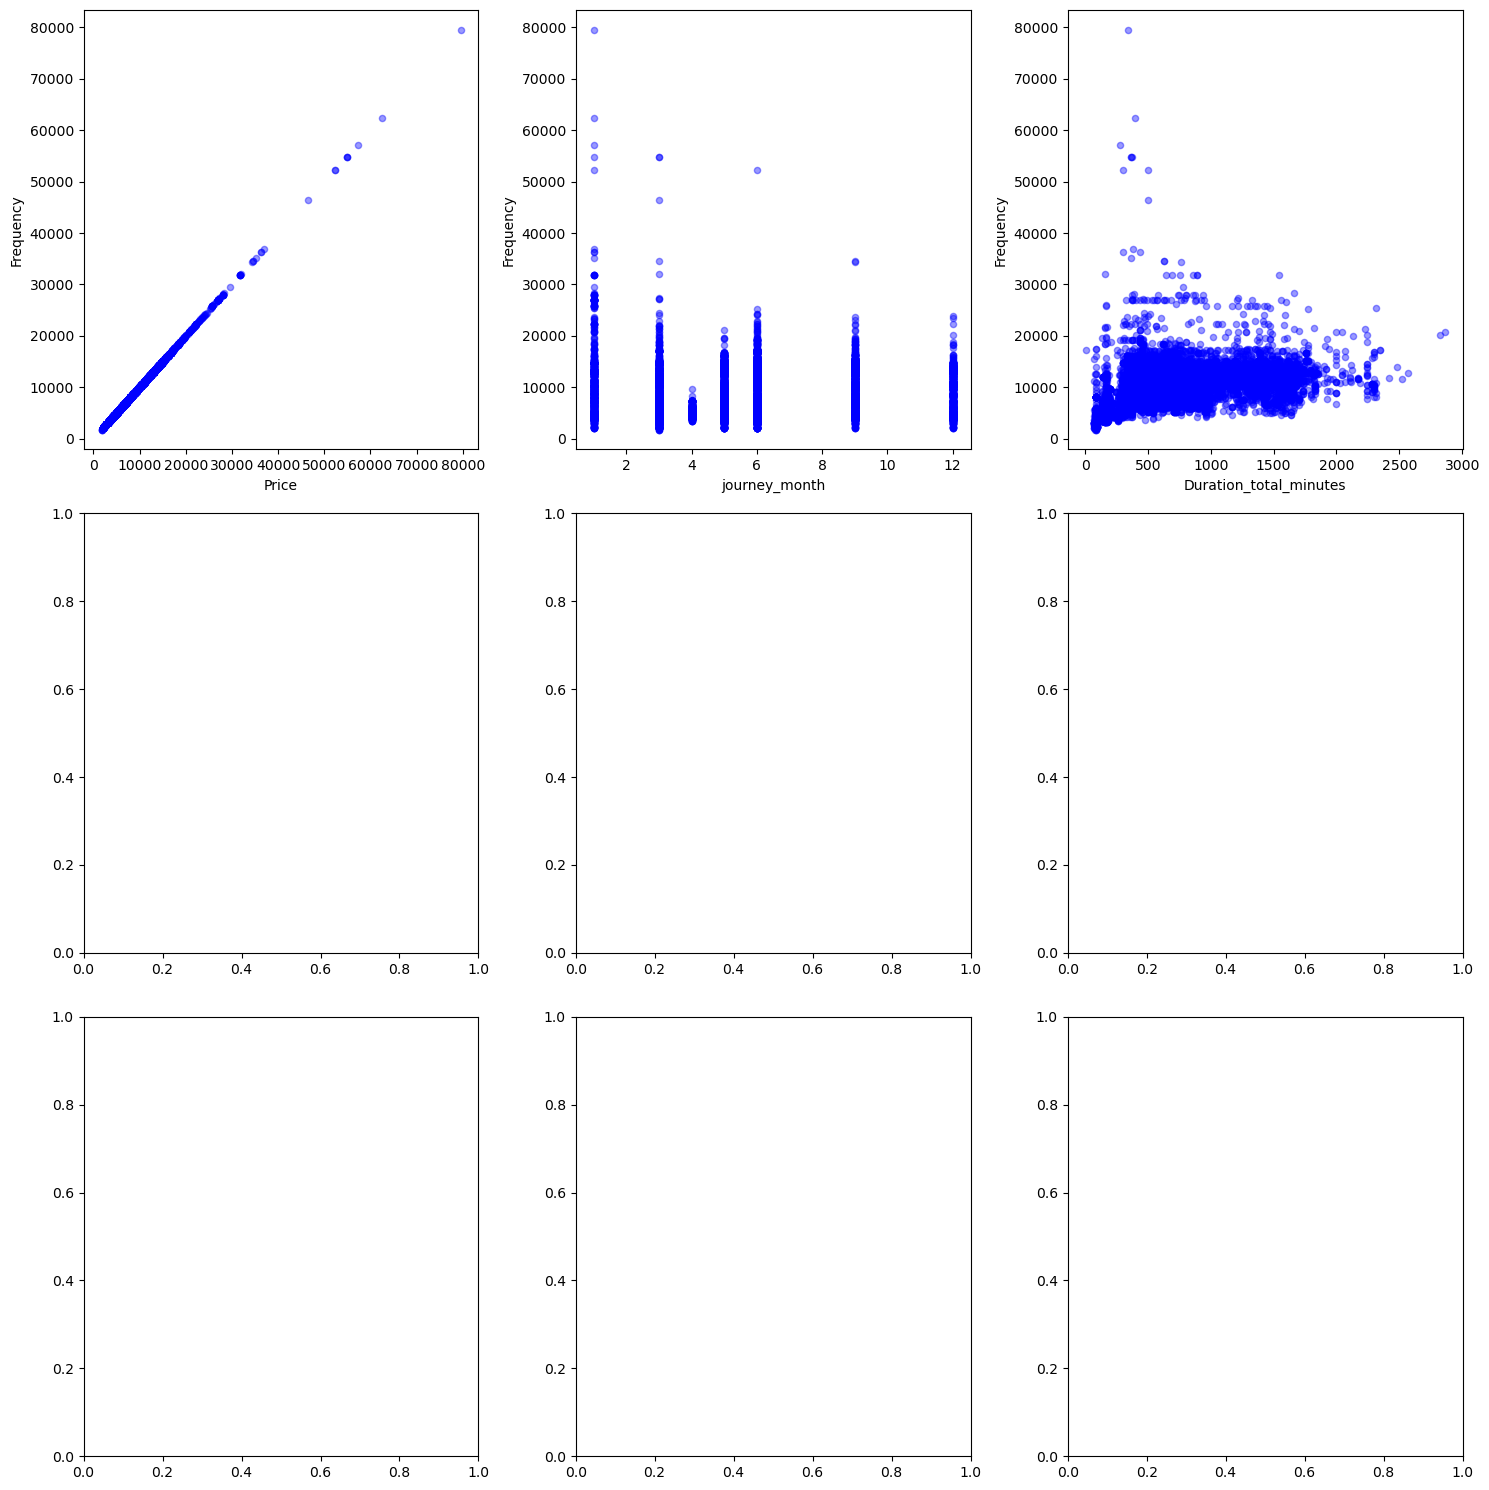

In [39]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
columns = ['Price', 'journey_month', 'Duration_total_minutes']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    if row < 3 and col < 3:  
        df.plot(kind='scatter', x=column, y='Price', ax=axs[row, col], alpha=0.4, color='b')
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(".\images\categorical.png", dpi = 150, bbox_inches = 'tight')

plt.show()


In [40]:
categorical.head(10)

0     170
1     445
2    1140
3     325
4     285
5     145
6     930
7    1265
8    1530
9     470
Name: Duration_total_minutes, dtype: int64

In [41]:
categorical = df[['Price', 'Duration_total_minutes']]

In [42]:
Airline_dummies = pd.get_dummies(df['Airline'], prefix='Airline', drop_first=True)
Source_dummies = pd.get_dummies(df['Source'], prefix='Source', drop_first=True)
Dest_dummies = pd.get_dummies(df['Destination'], prefix='Dest', drop_first=True)
Total_Stops_dummies = pd.get_dummies(df['Total_Stops'], prefix='Total_Stops', drop_first=True)
Jour_mth_dummies = pd.get_dummies(df['journey_month'], prefix='Jour_mth', drop_first=True)

dummies= pd.concat([Airline_dummies, Source_dummies, Dest_dummies, Total_Stops_dummies, Jour_mth_dummies])

dummies= pd.concat

In [43]:
# Assuming you have DataFrames df1, df2, etc., and you want to concatenate them
result = pd.concat([Airline_dummies, Source_dummies, Dest_dummies, Total_Stops_dummies, Jour_mth_dummies], axis=0)  # Concatenate along the rows (axis=0)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


In [45]:
Airline_dummies = pd.get_dummies(df['Airline'], prefix='Airline')
Source_dummies = pd.get_dummies(df['Source'], prefix='Source')
Dest_dummies = pd.get_dummies(df['Destination'], prefix='Dest')
Total_Stops_dummies = pd.get_dummies(df['Total_Stops'], prefix='Total_Stops')
Jour_mth_dummies = pd.get_dummies(df['journey_month'], prefix='Jour_mth')

In [54]:
dummies_full= pd.concat([Airline_dummies, Source_dummies, Dest_dummies, Total_Stops_dummies, Jour_mth_dummies])

In [55]:
df_1= df.drop(categorical, axis=1)

### Multicollinearity
***
to improve the performance of the model and have an accurate co-efficients, highly correlated variables must be removed.

In [56]:
df_pred= df_1.iloc[:,1:]

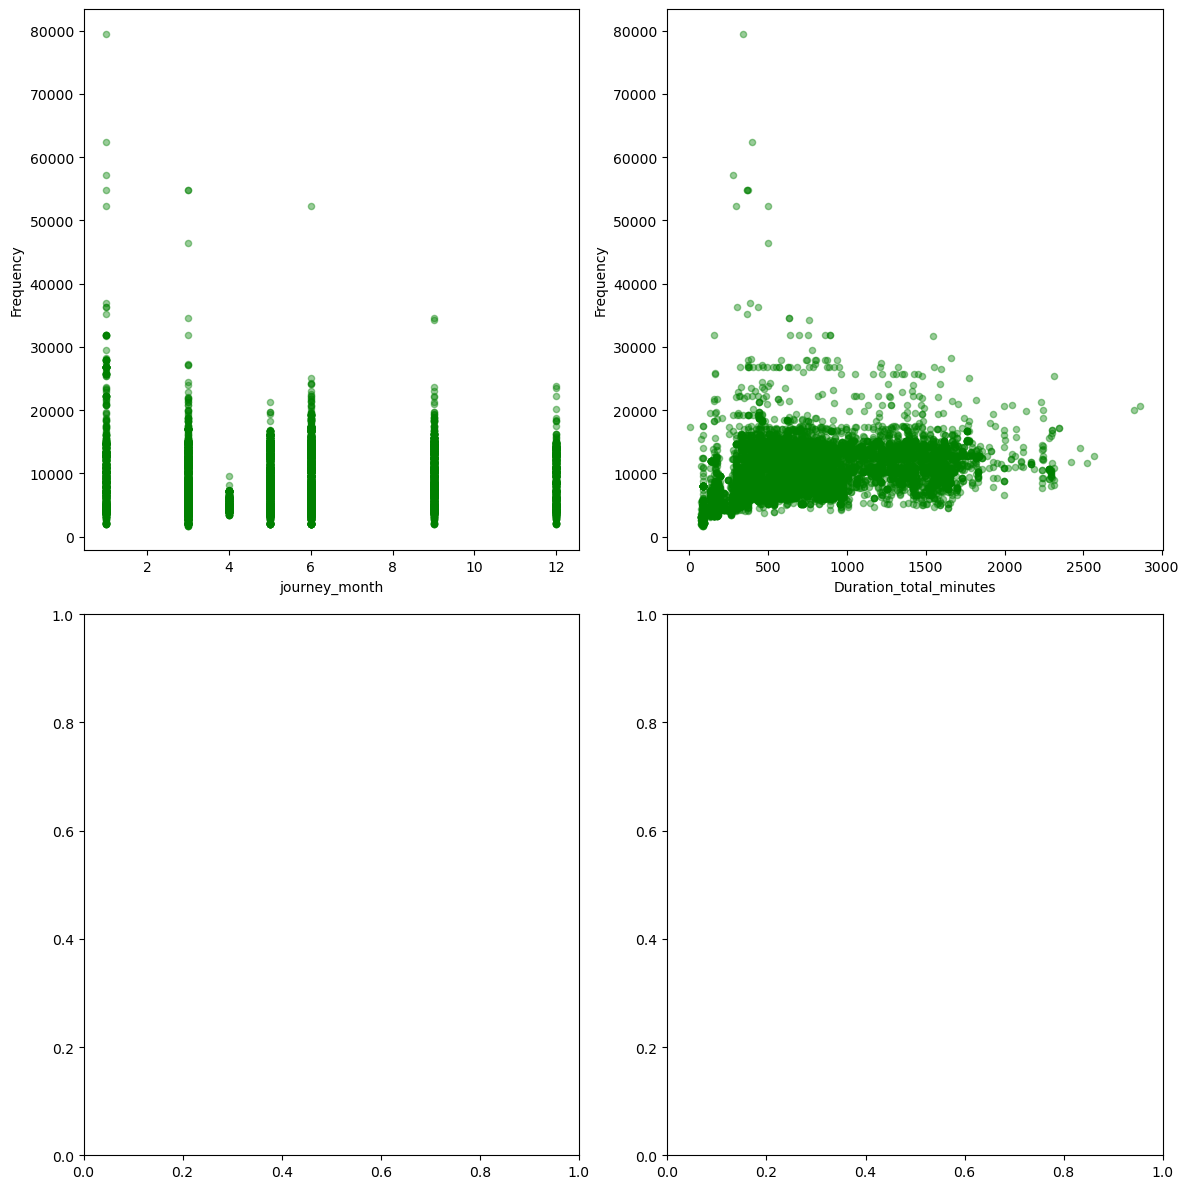

In [57]:
# We should create a histogram to confirm whether the data at hand is categorical.

fig, axs = plt.subplots(2,2, figsize=(12, 12))

columns = ['journey_month', 'Duration_total_minutes']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    df.plot(kind='scatter', x=column, y='Price', ax=axs[row, col], alpha=00.4, color='green')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig(".\images\categorical.png", dpi = 150, bbox_inches = 'tight')

plt.show()

Summary why multico is not done


## Model 2

In [66]:
# Assuming you have a function to create dummy variables
dummies = df
# Concatenate the original DataFrame and the dummy variables
df_1_dummies = pd.concat([df, dummies], axis=1)

In [67]:
df_1_dummies = pd.concat([df, dummies])

In [68]:
df_1_dummies.drop(['Airline', 'Source', 'Destination', 'Total_Stops', 'journey_month'], axis=1)

,Price,Duration_total_minutes
0,3897,170
1,7662,445
2,13882,1140
3,6218,325
4,13302,285
...,...,...
10677,4107,150
10678,4145,155
10679,7229,180
10680,12648,160


In [69]:
df_1_dummies.head(10)

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285
5,SpiceJet,Kolkata,Banglore,non-stop,3873,6,145
6,Jet Airways,Banglore,New Delhi,1 stop,11087,12,930
7,Jet Airways,Banglore,New Delhi,1 stop,22270,1,1265
8,Jet Airways,Banglore,New Delhi,1 stop,11087,12,1530
9,Multiple carriers,Delhi,Cochin,1 stop,8625,5,470


In [70]:
# Assuming you want to drop rows where the 'Price' column is NaN
condition = df['Price'].isnull()

# Use boolean indexing to create a mask
rows_to_drop = df[condition].index

# Drop the rows based on the mask
df.drop(rows_to_drop, inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)


In [71]:
print(df.columns)

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_month', 'Duration_total_minutes'],
      dtype='object')


In [72]:
predictors = df_1_dummies.drop(['Price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [73]:
model= ols(formula= formula, data= df_1_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1463.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:03:25   Log-Likelihood:            -2.0072e+05
No. Observations:               21364   AIC:                         4.015e+05
Df Residuals:                   21341   BIC:                         4.017e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     6583.7855    115.008     57.246      0.000    6358.361    6809.210
Airline[T.Air India]                          1742.2921    130.955     13.305      0.000    1485.611    1998.973
Airline[T.GoAir]                               -96.2927    188.810     -0.510      0.610    -466.375     273.789
Airline[T.IndiGo]                              265.4446    125.097      2.122      0.034      20.246     510.643
Airline[T.Jet Airways]                        4180.9711    123.979     33.723      0.000    3937.962    4423.980
Airline[T.Jet Airways Business]               4.829e+04    851.436     56.712      0.000    4.66e+04       5e+04
Airline[T.Multiple carriers]                  3397.6307    136.823     24.832      0.000    3129.448    3665.814
Airline[T.Multiple carriers Premium economy]  3940.4214    584.745      6.739      0.000    2794.278    5086.565
Airline[T.SpiceJet]                           -232.7289    137.966     -1.687      0.092    -503.153      37.695
Airline[T.Trujet]                            -2169.6040   2066.218     -1.050      0.294   -6219.546    1880.338
Airline[T.Vistara]                            2100.4261    150.832     13.926      0.000    1804.783    2396.069
Airline[T.Vistara Premium economy]            4071.3016   1195.831      3.405      0.001    1727.383    6415.221
Source[T.Chennai]                              734.6492     54.623     13.449      0.000     627.584     841.715
Source[T.Delhi]                                494.2684     26.422     18.707      0.000     442.479     546.058
Source[T.Kolkata]                             1101.7675     45.589     24.167      0.000    1012.409    1191.126
Source[T.Mumbai]                               -45.2265     42.442     -1.066      0.287    -128.417      37.964
Destination[T.Cochin]                          494.2684     26.422     18.707      0.000     442.479     546.058
Destination[T.Delhi]                           589.5872     68.473      8.610      0.000     455.374     723.800
Destination[T.Hyderabad]                       -45.2265     42.442     -1.066      0.287    -128.417      37.964
Destination[T.Kolkata]                         734.6492     54.623     13.449      0.000     627.584     841.715
Destination[T.New Delhi]                      3708.7397     63.201     58.681      0.000    3584.860    3832.619
Total_Stops[T.2 stops]                        2260.4214     70.611     32.012      0.000    2122.019    2398.824
Total_Stops[T.3 stops]                        3291.4006    314.370     10.470      0.000    2675.211    3907.590
Total_Stops[T.4 stops]                        5688.7446   2062.543      2.758      0.006    1646.005    9731.484
Total_Stops[T.non-stop]         

In [74]:
print(df_1_dummies.isnull().sum())


Airline                   0
Source                    0
Destination               0
Total_Stops               0
Price                     0
journey_month             0
Duration_total_minutes    0
dtype: int64


In [75]:
df_1_dummies = df_1_dummies.fillna(0)  # Replace NaN values with 0

In [76]:
df_1_dummies.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


## Normalize and log transformation
***

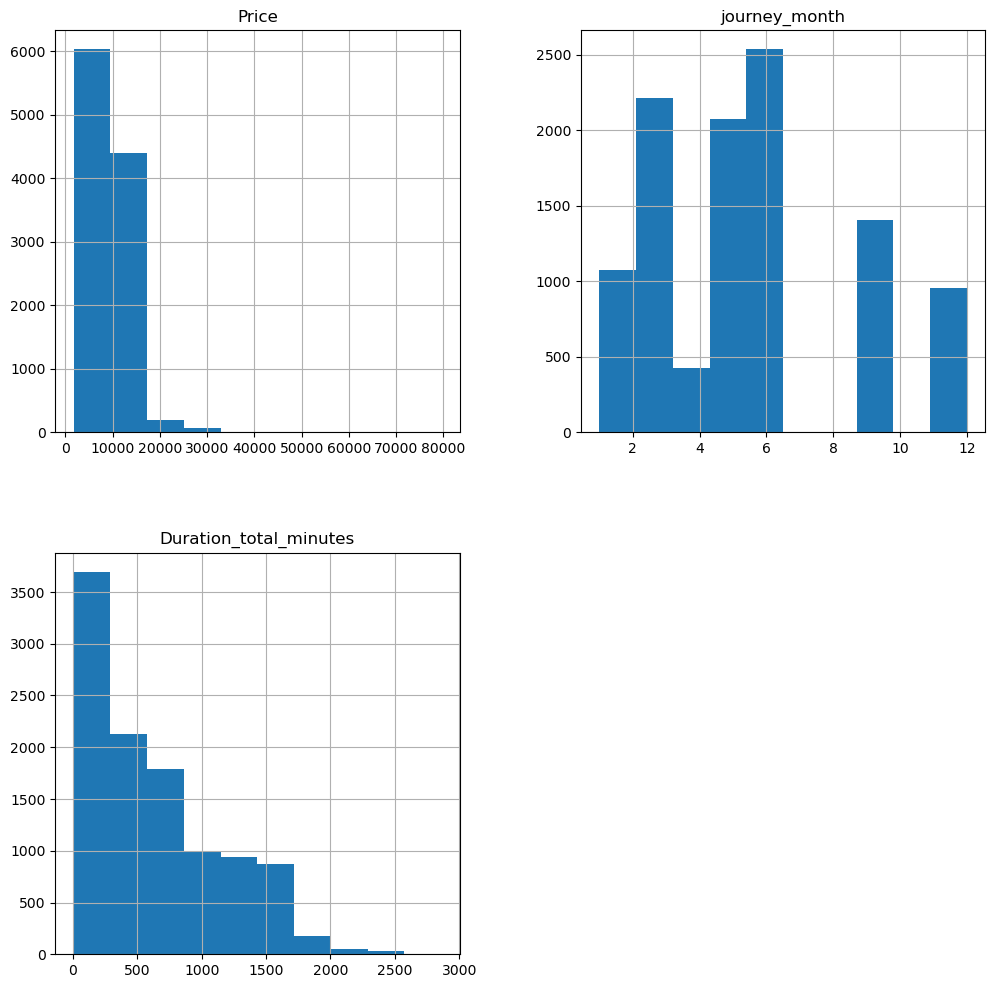

In [77]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax);

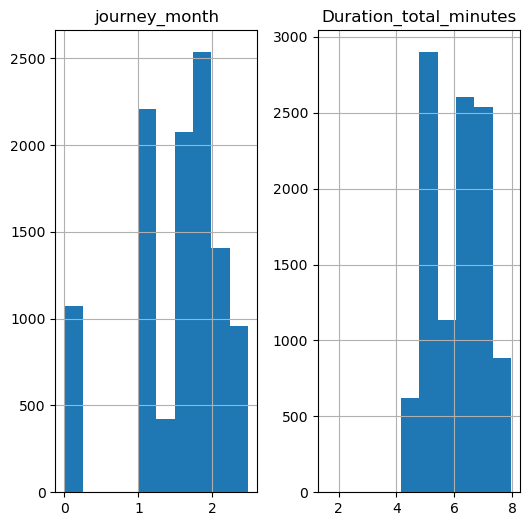

In [78]:
data_log = pd.DataFrame([])
data_log['journey_month'] = np.log(df['journey_month'])
data_log['Duration_total_minutes'] = np.log(df['Duration_total_minutes'])
data_log.hist(figsize = [6, 6]);

In [79]:
logjourney = data_log['journey_month']
logduration = data_log['Duration_total_minutes']

# We can normalize the data

scaled_journey = (logjourney - np.mean(logjourney)) / np.sqrt(np.var(logjourney))
scaled_duration = (logduration - np.mean(logduration)) / np.sqrt(np.var(logduration))

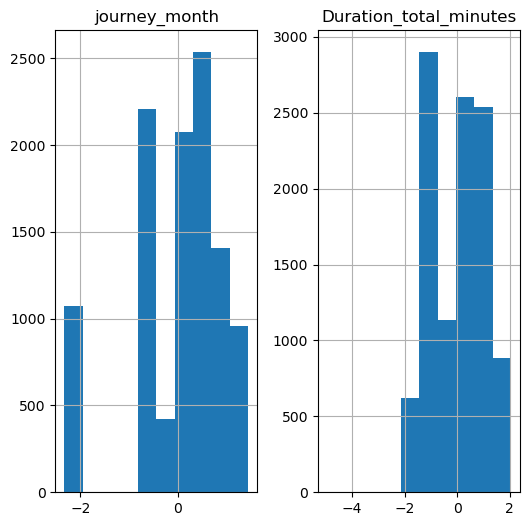

In [80]:

data_cont_scaled = pd.DataFrame([])

data_cont_scaled['journey_month'] = scaled_journey
data_cont_scaled['Duration_total_minutes'] = scaled_duration

data_cont_scaled.hist(figsize = [6, 6]);

<Axes: xlabel='Airline', ylabel='Price'>

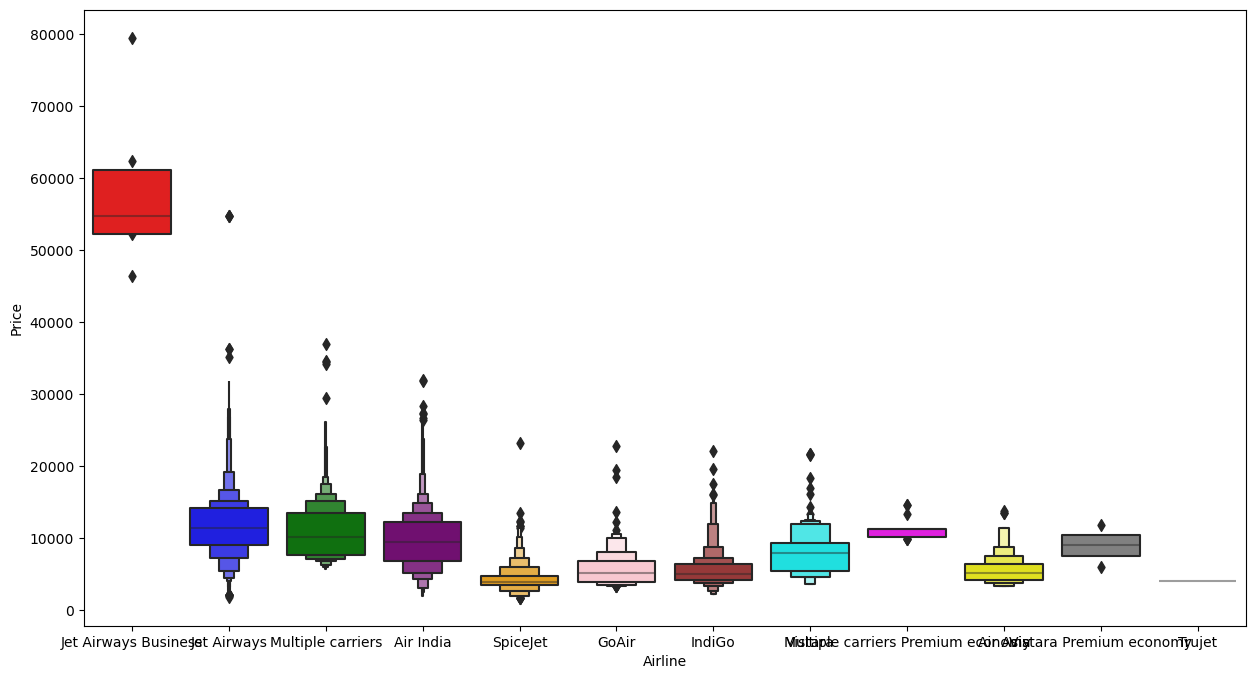

In [81]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'grey', 'lightgreen']

plt.figure(figsize=(15, 8))
sns.boxenplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False), palette=colors)

#### The graphical representation indicates that Jet Airways Business exhibits the highest pricing, while the remaining airlines, with the exception of the first one, display relatively similar median prices.


### Perform Total_Stops vs Price Analysis
***

<Axes: xlabel='Total_Stops', ylabel='Price'>

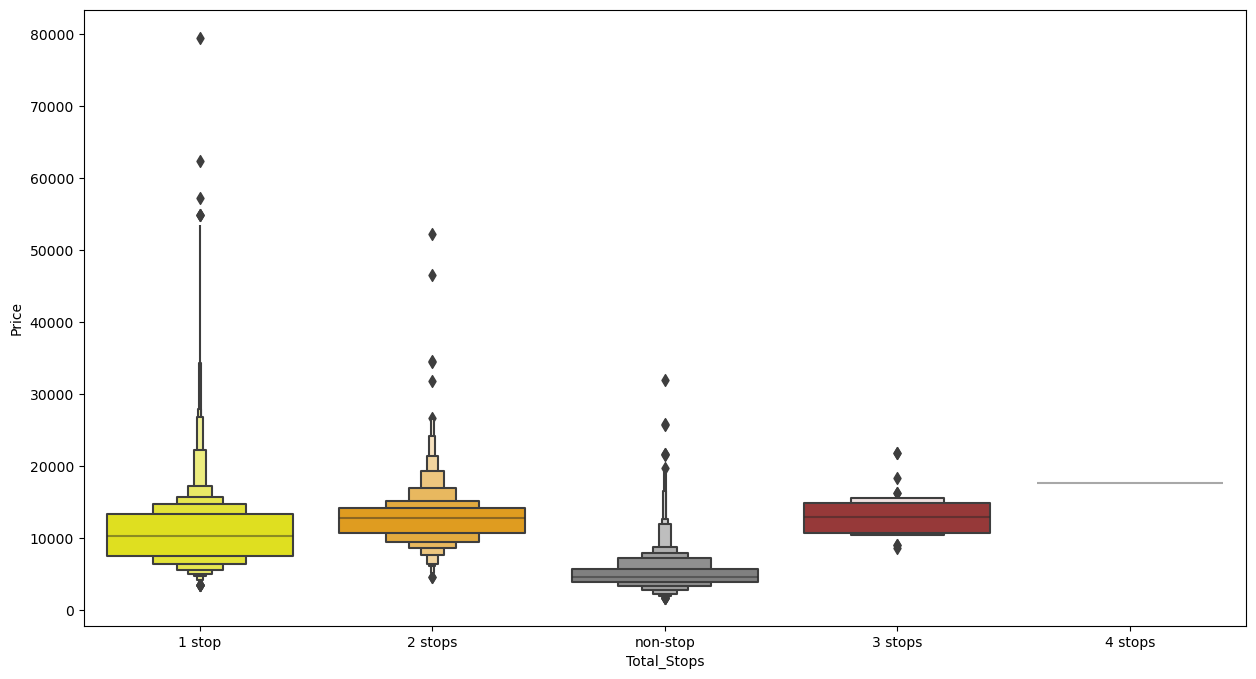

In [82]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending= False), palette=['yellow', 'orange', 'grey', 'brown', 'blue'])

#### Source vs Price

<Axes: xlabel='Source', ylabel='Price'>

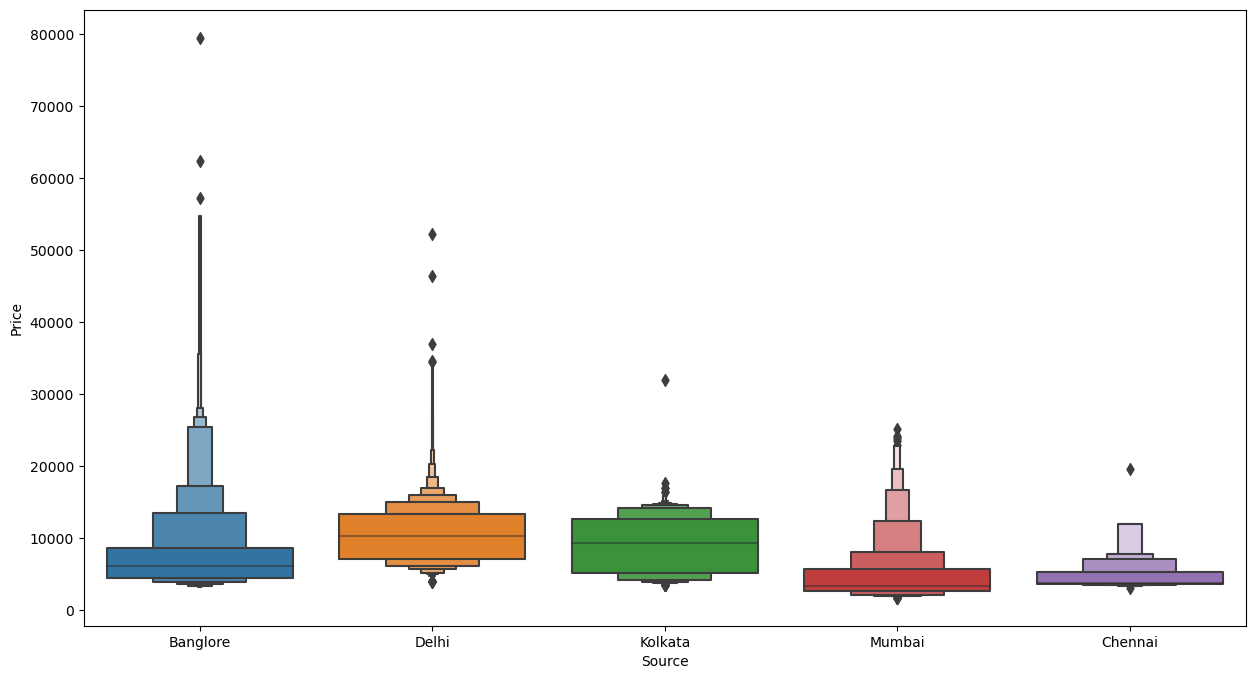

In [83]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Destination', ylabel='Price'>

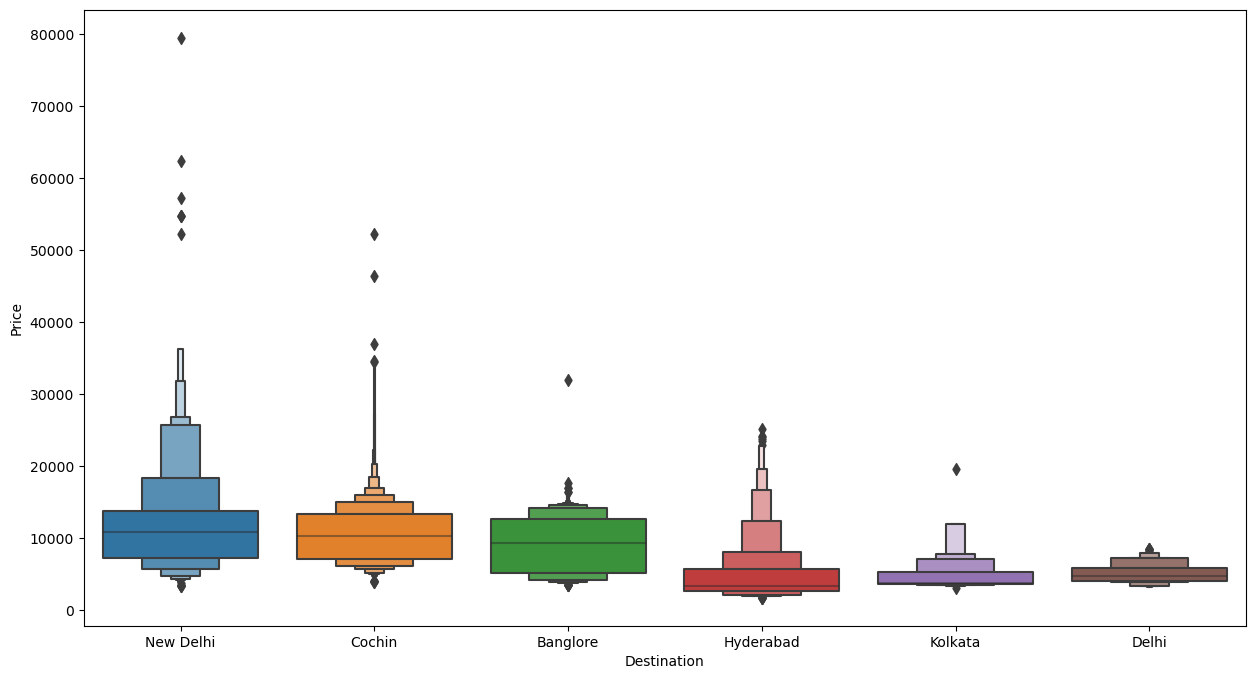

In [84]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [85]:
categorical.head()

,Price,Duration_total_minutes
0,3897,170
1,7662,445
2,13882,1140
3,6218,325
4,13302,285


In [86]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Price has total 1870 categories
Duration_total_minutes has total 368 categories


In [87]:
categorical.head()

,Price,Duration_total_minutes
0,3897,170
1,7662,445
2,13882,1140
3,6218,325
4,13302,285


### Checking for outliers
***

In [88]:
df_1_dummies.head()

,Airline,Source,Destination,Total_Stops,Price,journey_month,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,285


In [89]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

plot(df_1_dummies,'Price')

### Separate the dataset in X and Y columns

In [90]:
X= df_1_dummies.drop('Price',axis=1)
y= df['Price']

In [91]:
outcome = 'Price'
predictors = df.drop(['Price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [92]:
model = ols(formula = formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     730.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:03:57   Log-Likelihood:            -1.0036e+05
No. Observations:               10682   AIC:                         2.008e+05
Df Residuals:                   10659   BIC:                         2.009e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     6583.7855    162.734     40.457      0.000    6264.797    6902.774
Airline[T.Air India]                          1742.2921    185.298      9.403      0.000    1379.074    2105.510
Airline[T.GoAir]                               -96.2927    267.162     -0.360      0.719    -619.980     427.394
Airline[T.IndiGo]                              265.4446    177.009      1.500      0.134     -81.526     612.415
Airline[T.Jet Airways]                        4180.9711    175.428     23.833      0.000    3837.100    4524.843
Airline[T.Jet Airways Business]               4.829e+04   1204.761     40.080      0.000    4.59e+04    5.06e+04
Airline[T.Multiple carriers]                  3397.6307    193.601     17.550      0.000    3018.137    3777.125
Airline[T.Multiple carriers Premium economy]  3940.4214    827.400      4.762      0.000    2318.563    5562.280
Airline[T.SpiceJet]                           -232.7289    195.219     -1.192      0.233    -615.394     149.936
Airline[T.Trujet]                            -2169.6040   2923.649     -0.742      0.458   -7900.501    3561.293
Airline[T.Vistara]                            2100.4261    213.424      9.842      0.000    1682.075    2518.778
Airline[T.Vistara Premium economy]            4071.3016   1692.073      2.406      0.016     754.523    7388.080
Source[T.Chennai]                              734.6492     77.290      9.505      0.000     583.146     886.153
Source[T.Delhi]                                494.2684     37.387     13.220      0.000     420.984     567.553
Source[T.Kolkata]                             1101.7675     64.508     17.080      0.000     975.320    1228.215
Source[T.Mumbai]                               -45.2265     60.055     -0.753      0.451    -162.946      72.493
Destination[T.Cochin]                          494.2684     37.387     13.220      0.000     420.984     567.553
Destination[T.Delhi]                           589.5872     96.888      6.085      0.000     399.668     779.506
Destination[T.Hyderabad]                       -45.2265     60.055     -0.753      0.451    -162.946      72.493
Destination[T.Kolkata]                         734.6492     77.290      9.505      0.000     583.146     886.153
Destination[T.New Delhi]                      3708.7397     89.429     41.472      0.000    3533.443    3884.036
Total_Stops[T.2 stops]                        2260.4214     99.913     22.624      0.000    2064.574    2456.269
Total_Stops[T.3 stops]                        3291.4006    444.827      7.399      0.000    2419.457    4163.344
Total_Stops[T.4 stops]                        5688.7446   2918.449      1.949      0.051     -31.961    1.14e+04
Total_Stops[T.non-stop]         

## Feature Selection 
***
This revolves around identifying the optimal feature that exhibits a strong relationship with the independent variable, consequently mitigating issues associated with dimensionality reduction. To address this, we employ the mutual_info_classif method.

from sklearn.feature_selection import mutual_info_classif


In [93]:
from sklearn.feature_selection import mutual_info_classif

# Assuming 'Duration_total_minutes' is the new column you created
mutual_info_classif(df[['Duration_total_minutes']], df['Price'])


array([0.98347919])

imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

#### As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

## Models

In [94]:
# spiliting the dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

ValueError: Found input variables with inconsistent numbers of samples: [21364, 10682]

In [96]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

In [97]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (21364, 6)
Shape of y: (10682,)


In [98]:
from sklearn.impute import SimpleImputer

# Assuming X is your feature matrix
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Convert y to a NumPy array
y_array = y.to_numpy()

# Assuming y is your target variable
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y_array.reshape(-1, 1)).ravel()


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'IndiGo'

In [99]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression()

NameError: name 'X_train' is not defined

In [100]:
# Calculate the MSE
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

NameError: name 'X_train' is not defined

In [101]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

NameError: name 'y_train' is not defined

In [102]:
train_mse - test_mse

NameError: name 'train_mse' is not defined

In [103]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()


NameError: name 'X_train' is not defined

##### From the graph,it is clear that we predicted 84% correctly.

In [104]:
predict(LogisticRegression())

    

Model is: LogisticRegression()


NameError: name 'X_train' is not defined

In [ ]:
predict(KNeighborsRegressor())


In [ ]:
predict(DecisionTreeRegressor())

In [ ]:
from sklearn.svm import SVR
predict(SVR())

In [ ]:
predict(GradientBoostingRegressor())

## Hyper tuning the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [ ]:
# best parameter
rf_random.best_params_

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
r2_score(y_test,prediction)

### After hypertuning,the accuracy increases .
